**Chapter 5** 

**Custom CNN Model Overview**

Developed a custom Convolutional Neural Network (CNN) to classify maize leaf diseases.

**The architecture includes:**

4 convolutional layers with filters: 32 → 64 → 128 → 128

Each convolutional layer is followed by a MaxPooling2D layer

ReLU activation used in all hidden layers

Feature maps are flattened and passed through:

A dense layer with 512 neurons

A dropout layer with a rate of 0.3 to reduce overfitting

A final softmax output layer with 4 neurons for classification

**The model classifies images into 4 classes:**

Common Rust

Blight

Gray Leaf Spot

Healthy

**Training details:**

Optimizer: Adam

Learning Rate: 0.0001

Loss Function: Categorical Crossentropy

Evaluation Metric: Accuracy

Epochs: 20

Batch Size: 32

**Dataset:**

Training images: 4141

Validation images: 516

Test images: 522


**3. Total Number of Trainable Parameters**

Total parameters: 9,680,580

Trainable parameters: 9,680,580

Non-trainable parameters: 0

This is approximately 36.93 MB in model size.

**Performance:**

Final Training Accuracy: 98.36%

Best Validation Accuracy: 90.12%

Final Test Accuracy: 89.66%

**Tools & Libraries:**

TensorFlow / Keras for model development

Matplotlib and Seaborn for visualization

VisualKeras for architecture diagrams

In [4]:
#import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os

In [5]:
# Paths
base_dir ='/kaggle/input/maize-leaf-dataset/split_dataset' # Replace with the folder created by the split script
img_size = (224, 224)
batch_size = 32
epochs = 20

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

val_gen = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

test_gen = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)



Found 4141 images belonging to 4 classes.
Found 516 images belonging to 4 classes.
Found 522 images belonging to 4 classes.


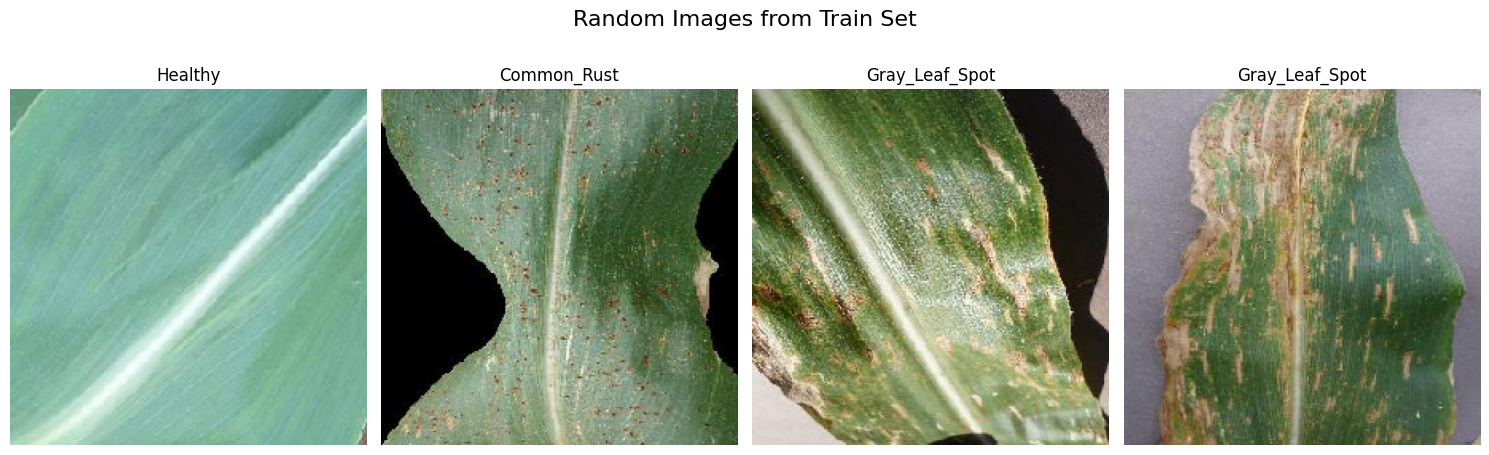

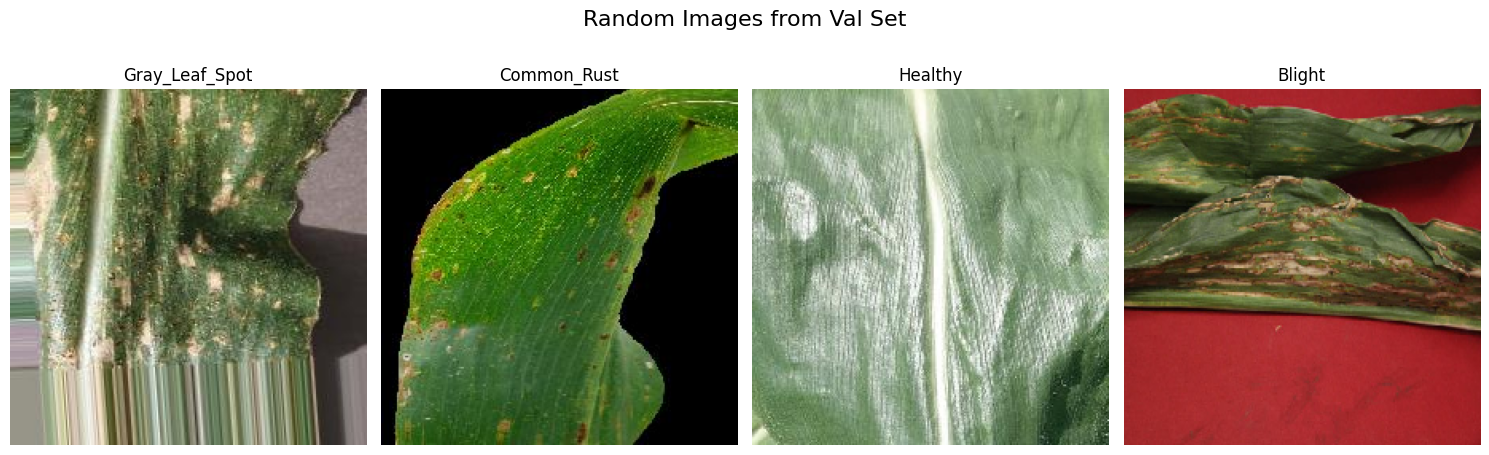

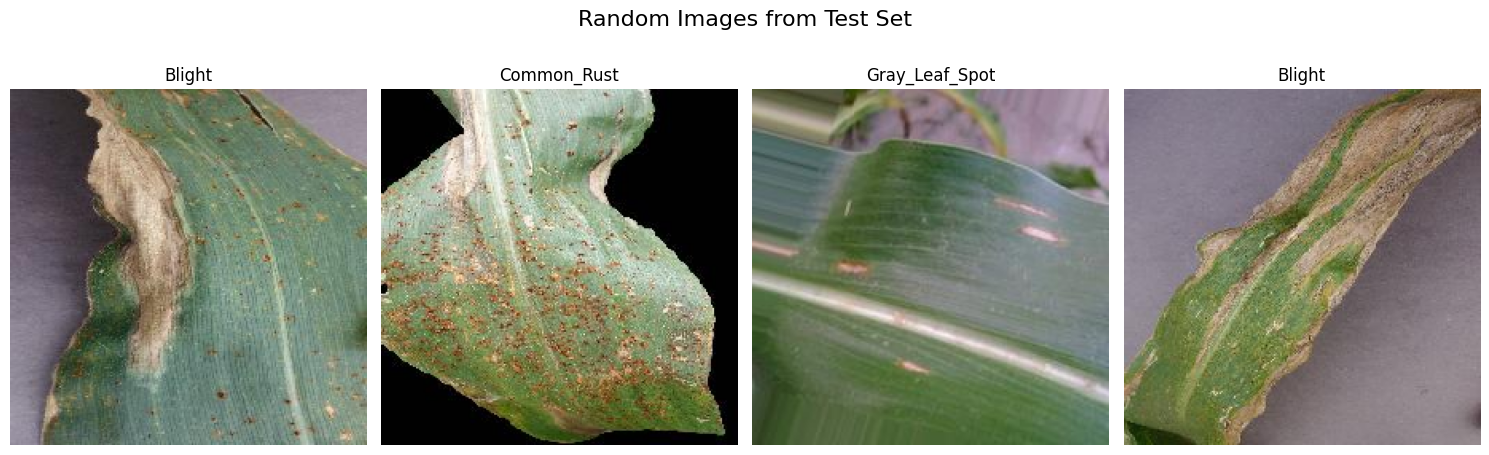

In [6]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img

# Helper function to display random images from a directory
def show_random_images_from_folder(folder_path, num_images=4):
    class_names = os.listdir(folder_path)
    class_names = [cls for cls in class_names if os.path.isdir(os.path.join(folder_path, cls))]

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Choose random class and random image
        class_name = random.choice(class_names)
        class_path = os.path.join(folder_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)

        # Load and show image
        img = load_img(image_path, target_size=(224, 224))
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f"{class_name}")
        plt.axis('off')
    plt.suptitle(f"Random Images from {os.path.basename(folder_path).capitalize()} Set", fontsize=16)
    plt.tight_layout()
    plt.show()

# Paths
base_dir ='/kaggle/input/maize-leaf-dataset/split_dataset'
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'val')
test_path = os.path.join(base_dir, 'test')

# Show images
show_random_images_from_folder(train_path)
show_random_images_from_folder(val_path)
show_random_images_from_folder(test_path)


**CNN Operation Count:**

All Conv2D layers use kernel size (3×3)

MACs (Multiply–Accumulate Operations) = 1 multiplication + 1 addition = 2 FLOPs

Input size: 
224×224×3

**1. Conv2D Layer 1**

Input: 
224×224×3

Filters: 32, Kernel: 
3×3

Output: 
222×222×32

MACs = 
222×222×32×3×3×3=42,670,464

FLOPs = 85,340,928

**2. Conv2D Layer 2**

Input: 
111×111×32

Filters: 64, Kernel: 
3×3

Output: 
109×109×64

MACs = 
109×109×64×3×3×32=219,469,824

FLOPs = 438,939,648

**3. Conv2D Layer 3**

Input: 
54×54×64

Filters: 128, Kernel: 
3×3

Output: 
52×52×128

MACs = 
52×52×128×3×3×64=332,943,360

FLOPs = 665,886,720

**4. Conv2D Layer 4**

Input: 
26×26×128

Filters: 128, Kernel: 
3×3

Output: 
24×24×128

MACs = 
24×24×128×3×3×128=339,738,624

FLOPs = 679,477,248

**5. Flatten Layer**

Output: 18,432 neurons

No computation → 0 FLOPs

**6. Dense Layer (512 units)**

Input: 18,432

Output: 512

MACs = 
18,432×512=9,437,184

FLOPs = 18,874,368

**7. Dense Output Layer (4 units)**

Input: 512

Output: 4

MACs = 
512×4=2,048

FLOPs = 4,096

**Total Operations**

Total MACs: 944,261,504

Total FLOPs: 1,888,523,008 (~1.89 GFLOPs)

Model Size: 9.68 million parameters (~36.93 MB)

In [7]:
# Define custom CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1749980169.721492      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,680,580 (36.93 MB)

 Trainable params: 9,680,580 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

| **Layer**              | **Output Shape** | **MACs**    | **FLOPs (2×MACs)** | **Description**                    |
| ---------------------- | ---------------- | ----------- | ------------------ | ---------------------------------- |
| Conv2D-1 (32 filters)  | 222 × 222 × 32   | 42,670,464  | 85,340,928         | Low-level feature extraction       |
| MaxPooling2D-1         | 111 × 111 × 32   | 0           | 0                  | Downsampling                       |
| Conv2D-2 (64 filters)  | 109 × 109 × 64   | 219,469,824 | 438,939,648        | Mid-level feature extraction       |
| MaxPooling2D-2         | 54 × 54 × 64     | 0           | 0                  | Downsampling                       |
| Conv2D-3 (128 filters) | 52 × 52 × 128    | 332,943,360 | 665,886,720        | Deeper feature learning            |
| MaxPooling2D-3         | 26 × 26 × 128    | 0           | 0                  | Downsampling                       |
| Conv2D-4 (128 filters) | 24 × 24 × 128    | 339,738,624 | 679,477,248        | Final convolutional feature map    |
| MaxPooling2D-4         | 12 × 12 × 128    | 0           | 0                  | Downsampling                       |
| Flatten                | 18,432           | 0           | 0                  | Converts 3D to 1D for dense input  |
| Dense (512 units)      | 512              | 9,437,184   | 18,874,368         | Fully connected layer              |
| Dropout (0.3)          | 512              | 0           | 0                  | Regularization                     |
| Dense (4 units)        | 4                | 2,048       | 4,096              | Final softmax output for 4 classes |


In [8]:
# Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1749980174.774600     124 service.cc:148] XLA service 0x79aa4800df40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749980174.775512     124 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749980175.117945     124 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/130 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.2917 - loss: 1.3886

I0000 00:00:1749980179.416485     124 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


130/130 ━━━━━━━━━━━━━━━━━━━━ 33s 199ms/step - accuracy: 0.5420 - loss: 1.0318 - val_accuracy: 0.7829 - val_loss: 0.4798
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.8067 - loss: 0.4572 - val_accuracy: 0.8275 - val_loss: 0.4162
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.8409 - loss: 0.3901 - val_accuracy: 0.8198 - val_loss: 0.3890
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.8538 - loss: 0.3434 - val_accuracy: 0.8275 - val_loss: 0.4017
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8689 - loss: 0.3179 - val_accuracy: 0.8779 - val_loss: 0.3085
Epoch 6/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.8871 - loss: 0.2846 - val_accuracy: 0.8643 - val_loss: 0.3308
Epoch 7/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.8949 - loss: 0.2641 - val_accuracy: 0.8391 - val_loss: 0.3973
Epoch 8/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8972 - loss: 0.2504 - val_accur

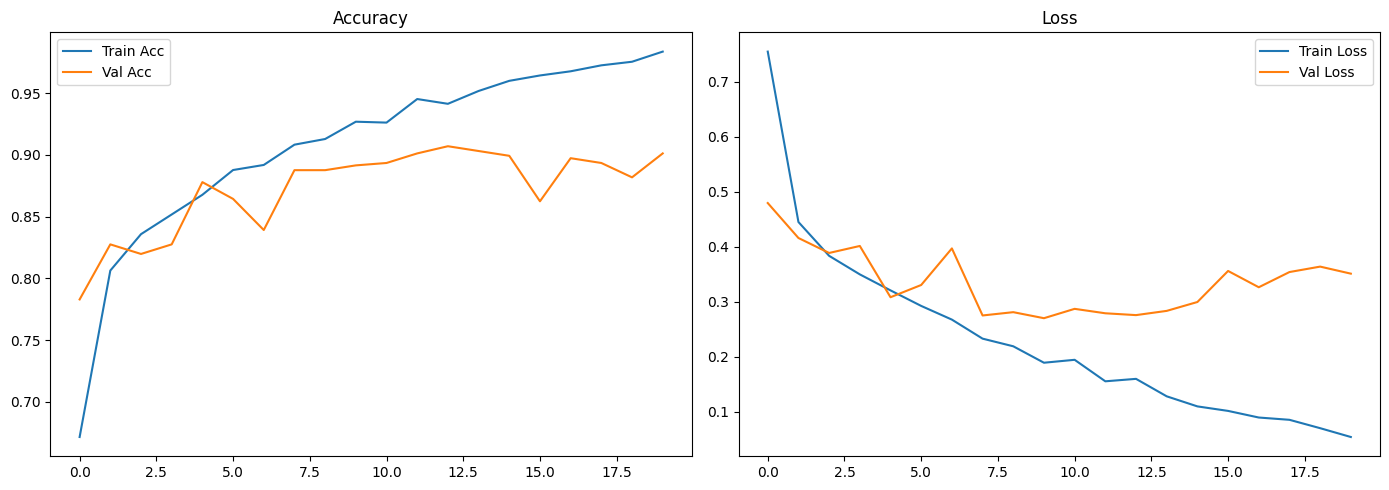

In [9]:
# =============================
# Step 5: Plot Accuracy & Loss
# =============================
def plot_metrics(history):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(history)




Architectural block of cnn

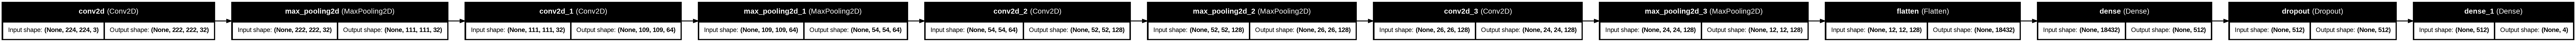

In [16]:

from tensorflow.keras.utils import plot_model

# Save the model architecture as a simple horizontal image
plot_model(model,
           to_file='model_architecture.png',
           show_shapes=True,
           show_layer_names=True,
           rankdir='LR')  # LR = Left to Right
from IPython.display import Image
Image(filename='model_architecture.png')



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step


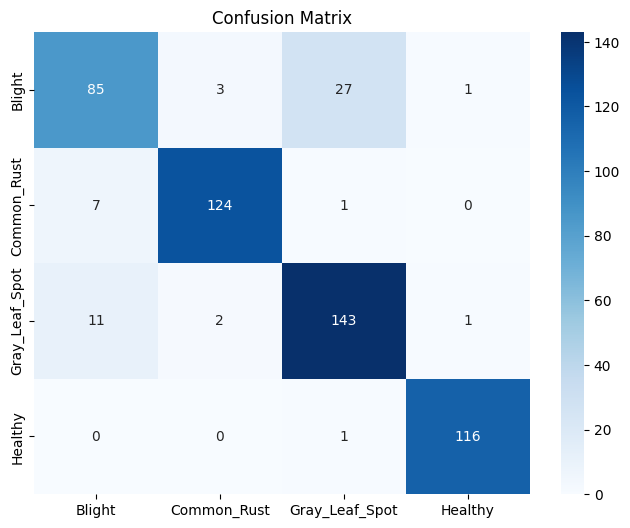

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       116
           1       0.96      0.94      0.95       132
           2       0.83      0.91      0.87       157
           3       0.98      0.99      0.99       117

    accuracy                           0.90       522
   macro avg       0.90      0.89      0.90       522
weighted avg       0.90      0.90      0.90       522



In [17]:
# ---------------------- 5. Confusion Matrix ----------------------
import seaborn as sns
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices, yticklabels=test_gen.class_indices)
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes))



In [19]:
# 6. Print Train and Validation Accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(f"\n Final Training Accuracy: {train_acc[-1]*100:.2f}%")
print(f" Final Validation Accuracy: {val_acc[-1]*100:.2f}%")

test_loss, test_acc = model.evaluate(test_gen)
print(f" Test Accuracy: {test_acc*100:.2f}%")




✅ Final Training Accuracy: 98.36%
✅ Final Validation Accuracy: 90.12%
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8205 - loss: 0.5538
✅ Test Accuracy: 89.66%



Class: Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


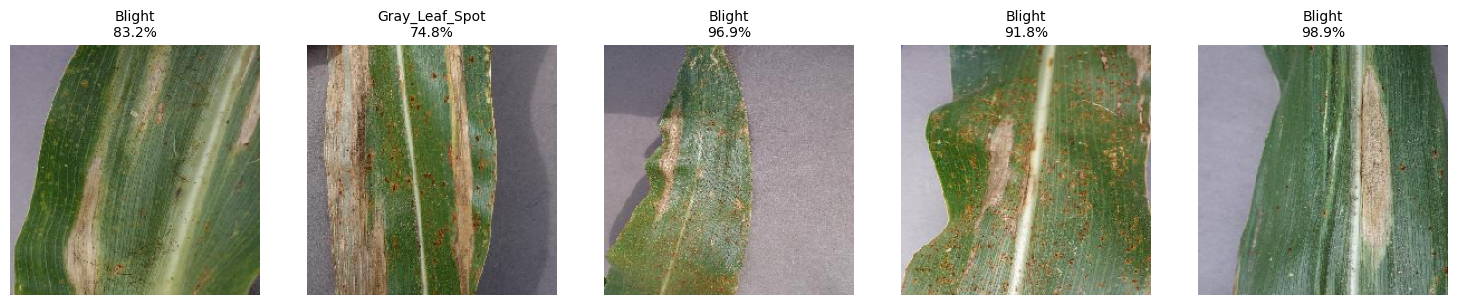


Class: Common_Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


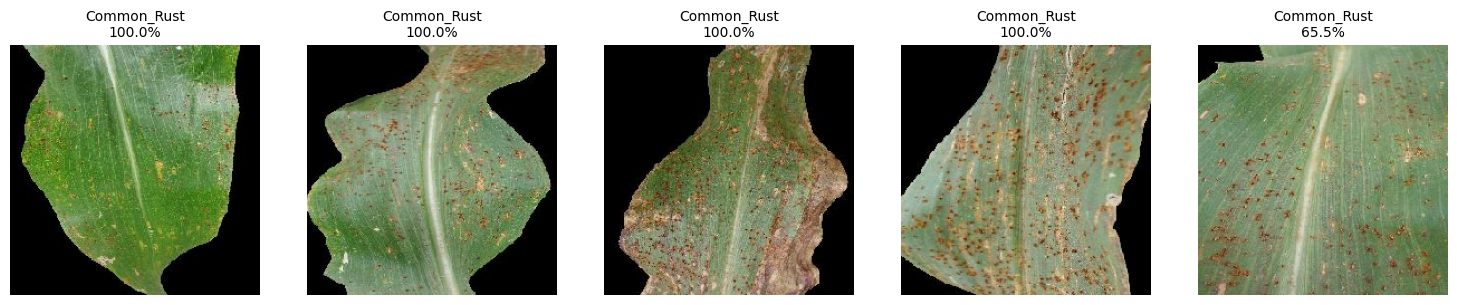


Class: Gray_Leaf_Spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


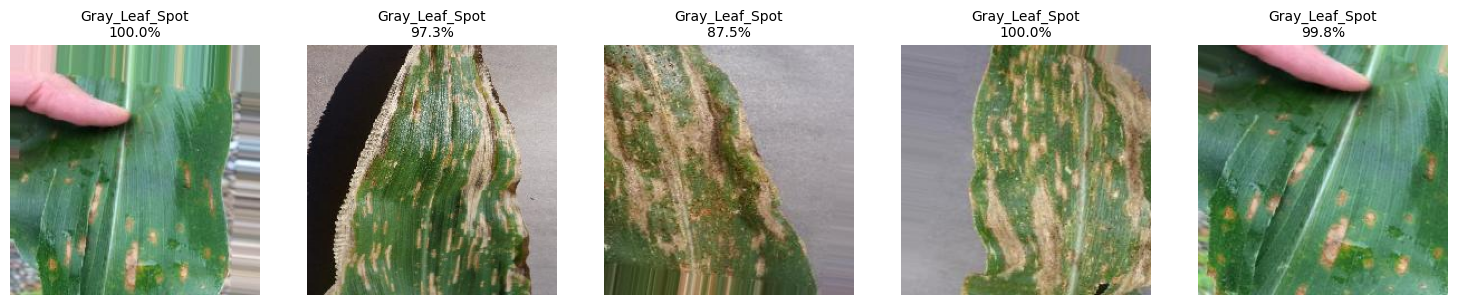


Class: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


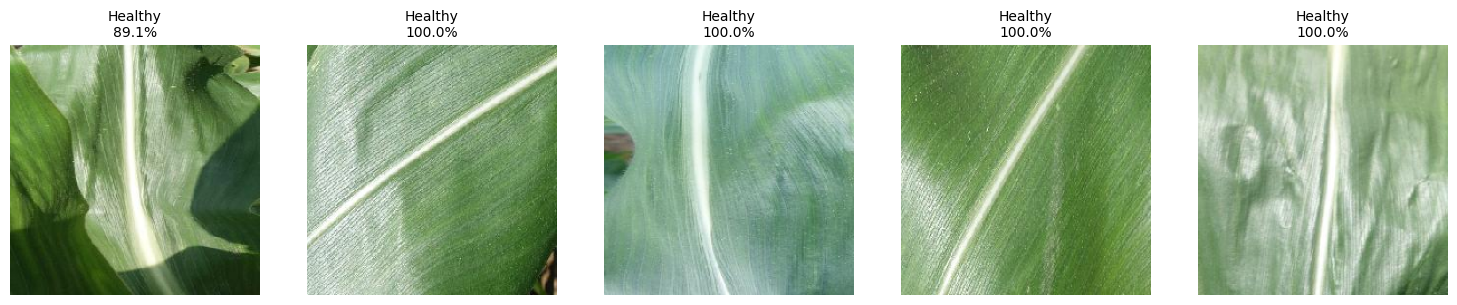

In [20]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths (change these if needed)
test_dir = '/kaggle/input/maize-leaf-dataset/split_dataset/test'    # Your test dataset folder
#model_path = 'vgg16_model.h5'            # Your trained model

# Load the model
#model = load_model(model_path)

# Image size
img_size = (224, 224)

# Get class names from test folder
class_names = sorted(os.listdir(test_dir))

# Go through each class
for class_name in class_names:
    class_path = os.path.join(test_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
    selected_images = random.sample(image_files, 5)  # Pick 5 random images

    print(f"\nClass: {class_name}")
    plt.figure(figsize=(15, 3))

    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(class_path, img_file)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)
        pred_class = class_names[np.argmax(prediction)]
        confidence = np.max(prediction) * 100

        # Show image and prediction
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{pred_class}\n{confidence:.1f}%', fontsize=10)

    plt.tight_layout()
    plt.show()


In [21]:
# Save the model
model.save('/content/drive/MyDrive/maize/maize_leaf_detection_cnn.h5')